In [1]:
from statsmodels.tools.sm_exceptions import ValueWarning

import VARmodel
import loadDataForSKtime
import ARIMAmodel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [2]:
loaderHR = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR'])
sktime_df = loaderHR.load_data(1000)
train_data, test_data = loaderHR.split_train_test(sktime_df)

## pickle the data

<class 'list'>
Patient 26: Less than 15 time points — skipping.
Patient 27: Less than 15 time points — skipping.
Patient 34: Less than 15 time points — skipping.
Patient 55: Less than 15 time points — skipping.
Patient 56: Less than 15 time points — skipping.
Patient 58: Less than 15 time points — skipping.
Patient 60: Less than 15 time points — skipping.
Patient 63: Less than 15 time points — skipping.
Patient 69: Less than 15 time points — skipping.
Patient 74: Less than 15 time points — skipping.
Patient 126: Less than 15 time points — skipping.
Patient 211: Less than 15 time points — skipping.
Patient 260: Less than 15 time points — skipping.
Patient 266: Less than 15 time points — skipping.
Patient 297: Less than 15 time points — skipping.
Patient 354: Less than 15 time points — skipping.
Patient 371: Less than 15 time points — skipping.
Patient 384: Less than 15 time points — skipping.
Patient 403: Less than 15 time points — skipping.
Patient 438: Less than 15 time points — skipp

In [3]:
sktime_df

HR
Patient_ID ICULOS       
1          1        -1.0
           2        97.0
           3        89.0
           4        90.0
           5       103.0
...                  ...
57         33       94.0
           34      101.0
           35       96.0
           36       98.0
           37      105.0

[2197 rows x 1 columns]

In [4]:
train_data.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (57, 22),
            (57, 23),
            (57, 24),
            (57, 25),
            (57, 26),
            (57, 27),
            (57, 28),
            (57, 29),
            (57, 30),
            (57, 31)],
           names=['Patient_ID', 'ICULOS'], length=1885)

In [4]:
test_data.index

MultiIndex([( 1, 49),
            ( 1, 50),
            ( 1, 51),
            ( 1, 52),
            ( 1, 53),
            ( 1, 54),
            ( 2, 18),
            ( 2, 19),
            ( 2, 20),
            ( 2, 21),
            ...
            (57, 34),
            (57, 35),
            (57, 36),
            (57, 37),
            (58,  3),
            (58,  4),
            (58,  5),
            (58,  6),
            (58,  7),
            (58,  8)],
           names=['Patient_ID', 'ICULOS'], length=348)

In [ ]:
train_data.columns

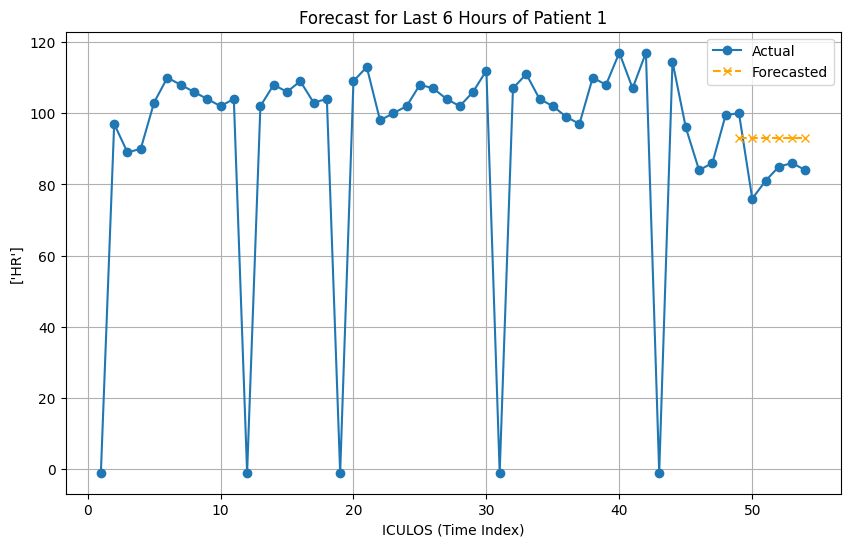

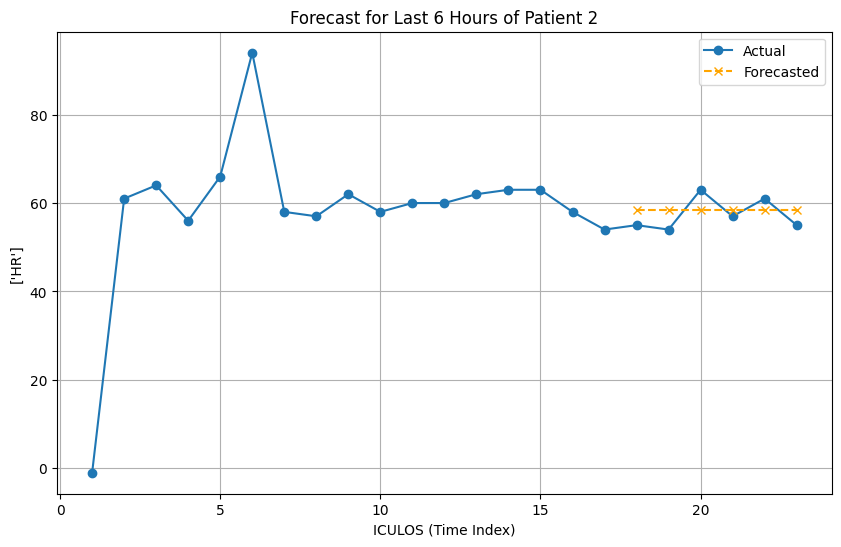

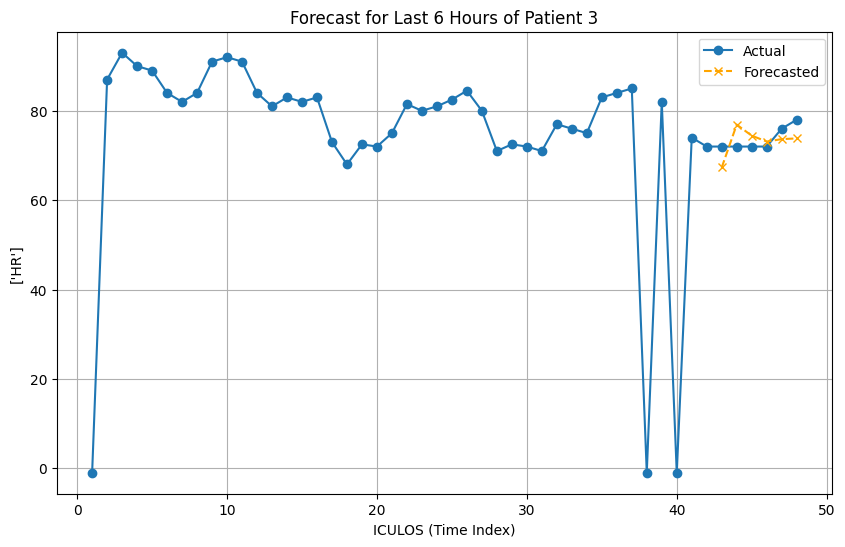

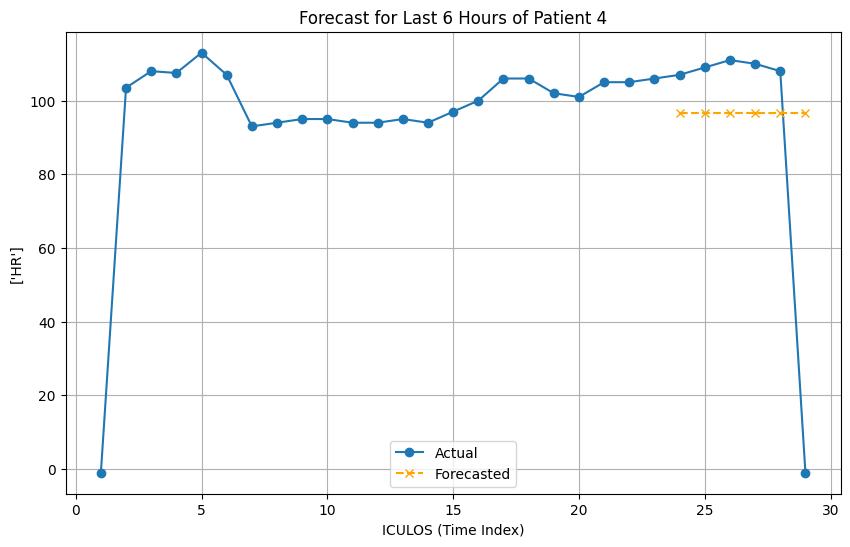

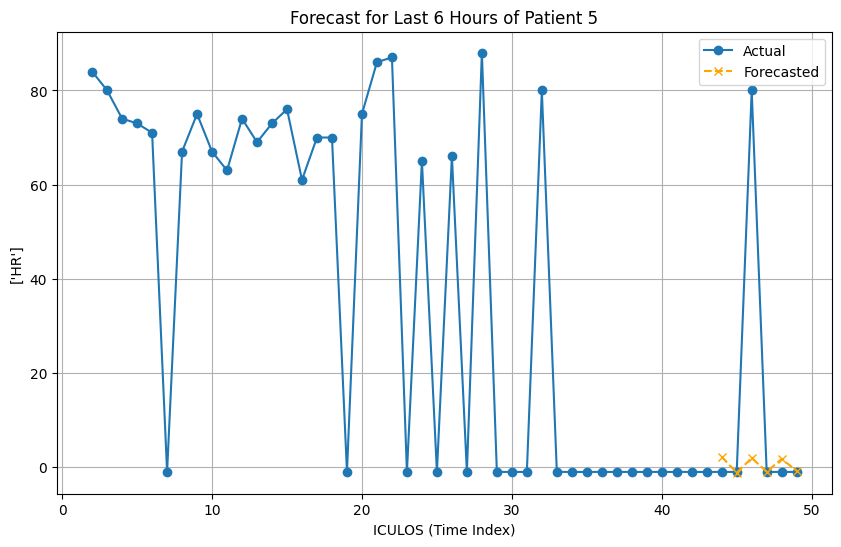

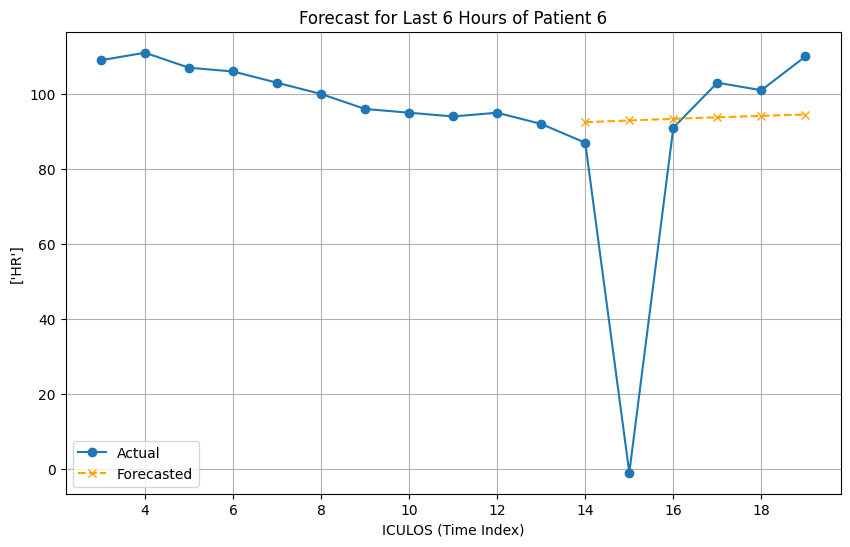

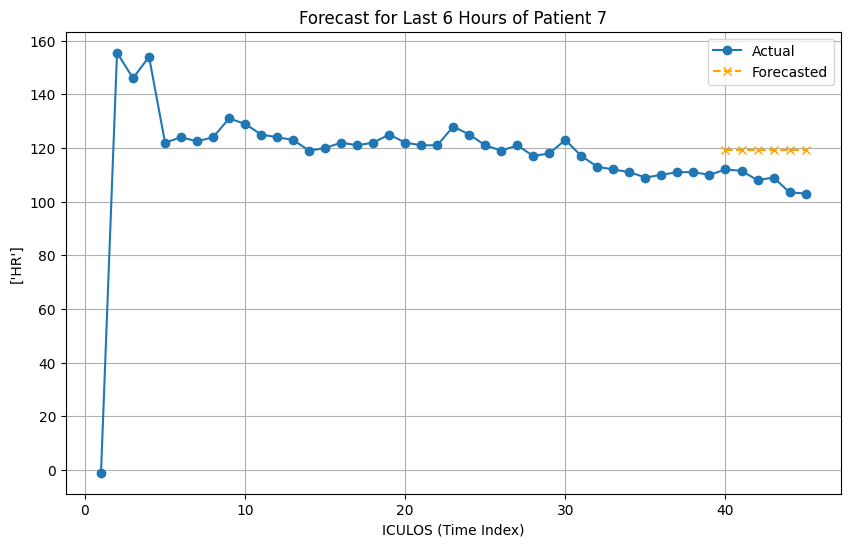

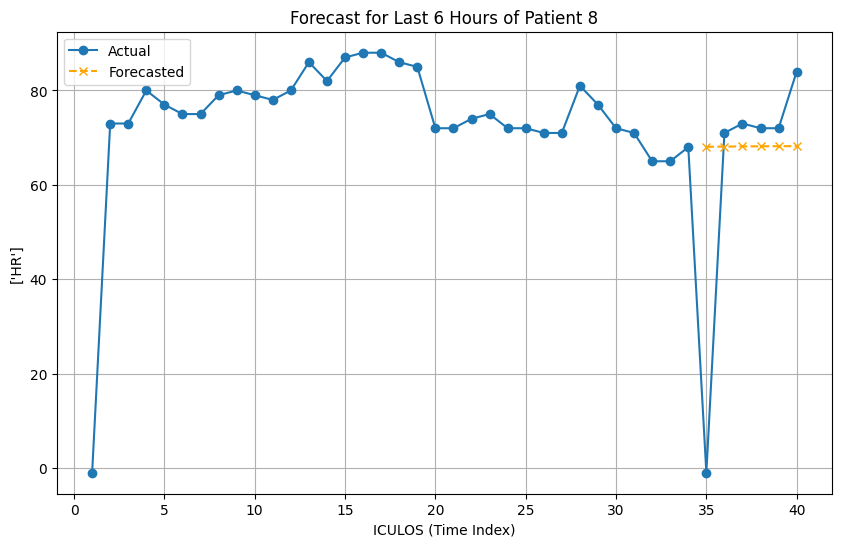

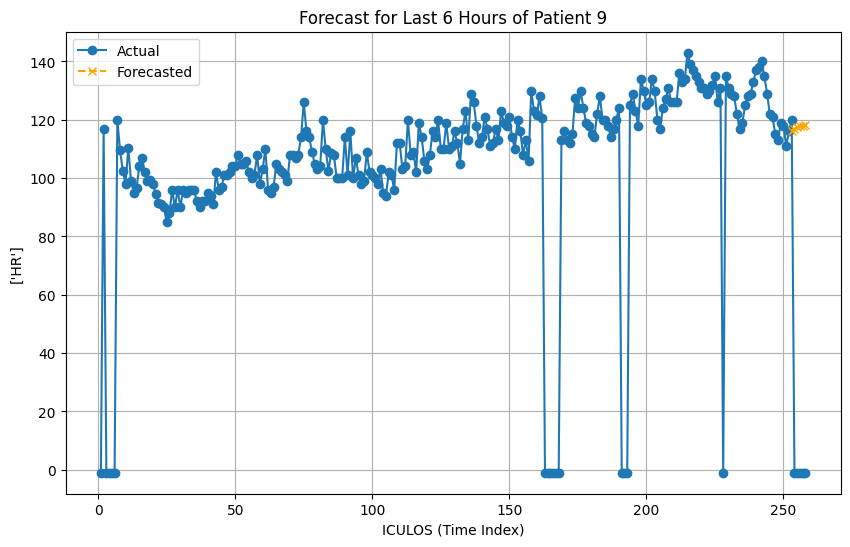

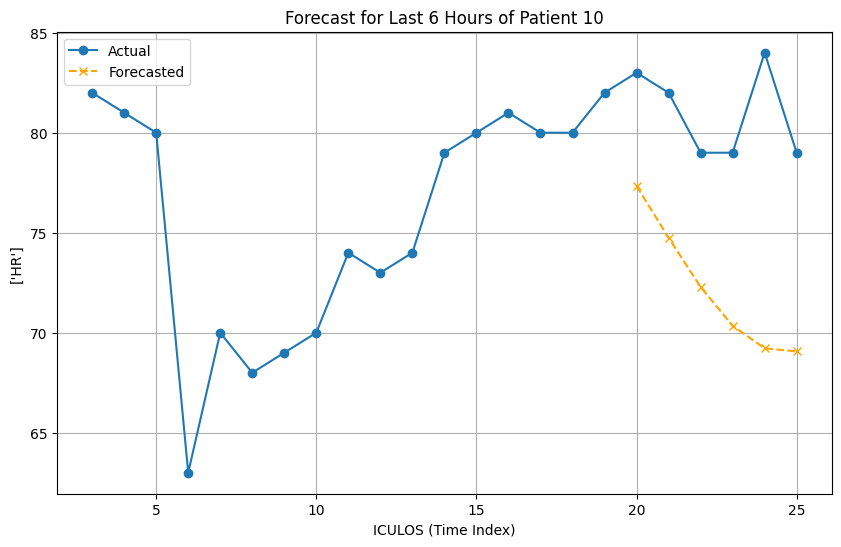

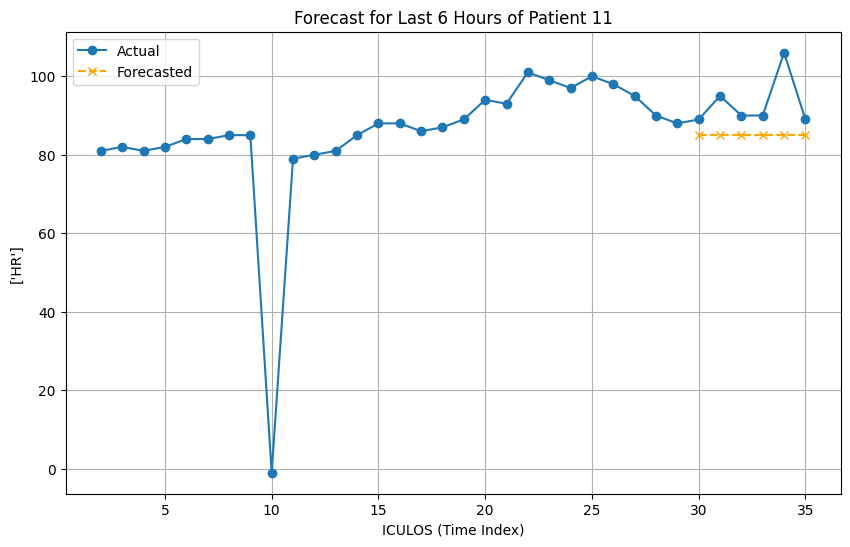

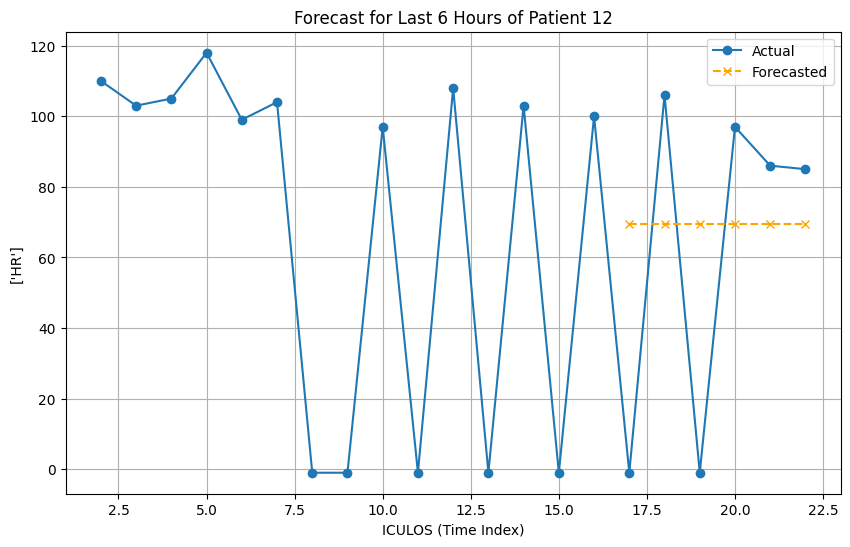

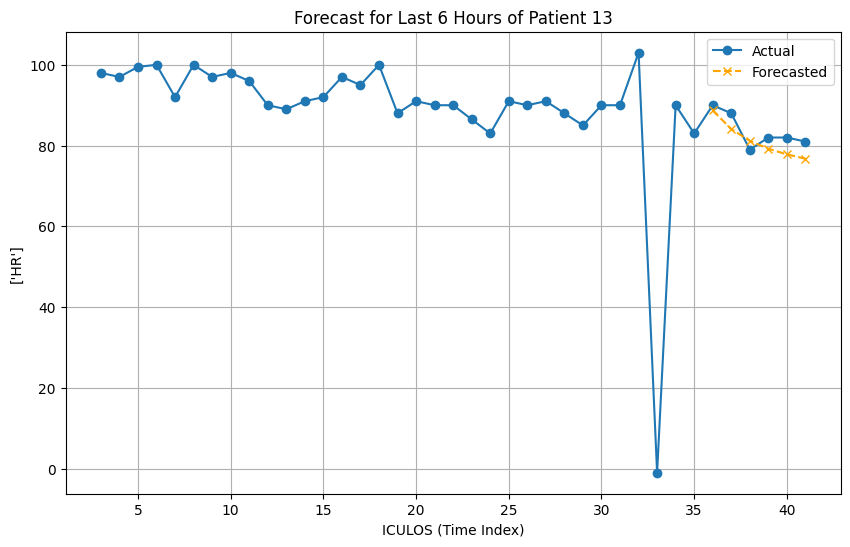

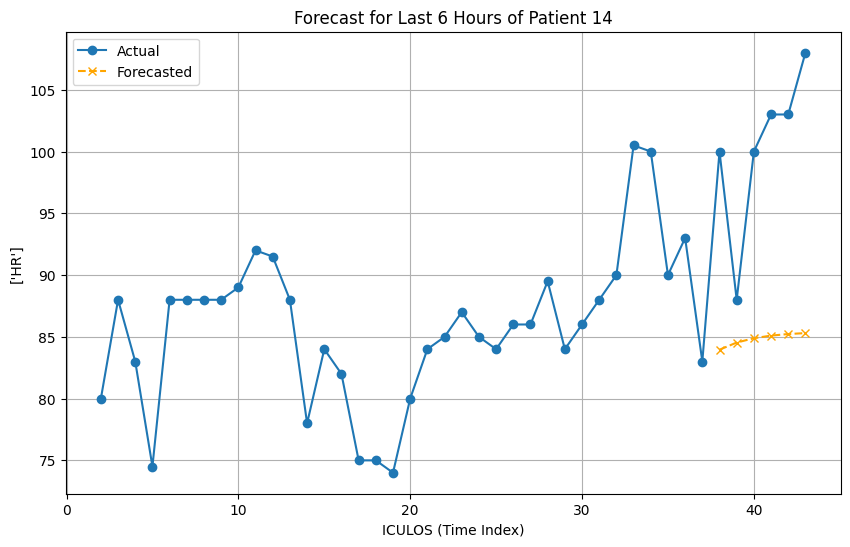

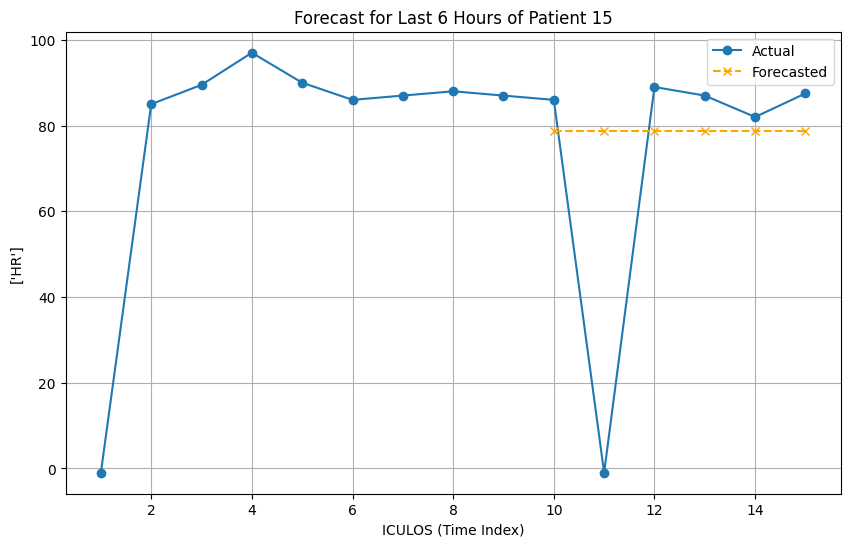

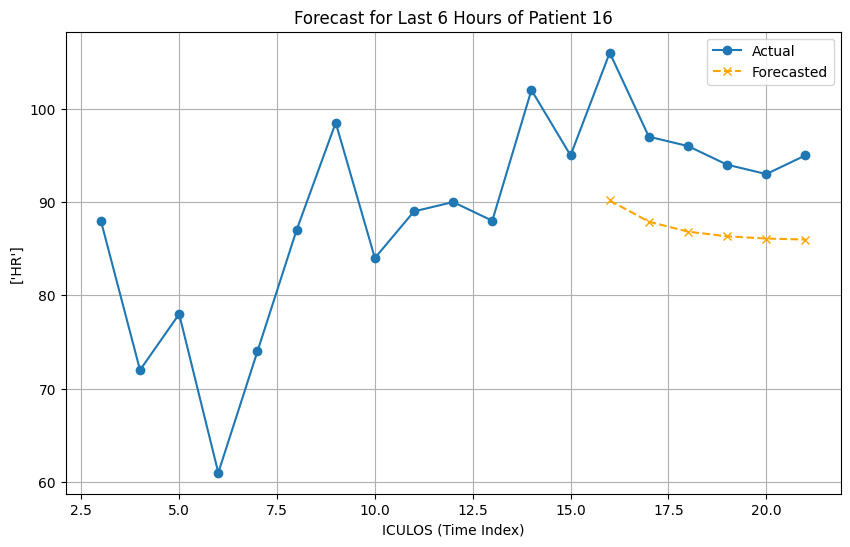

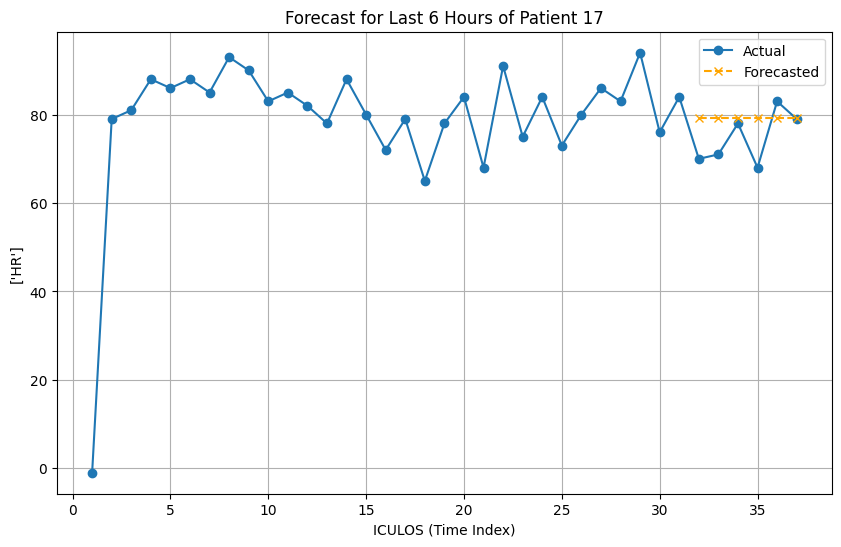

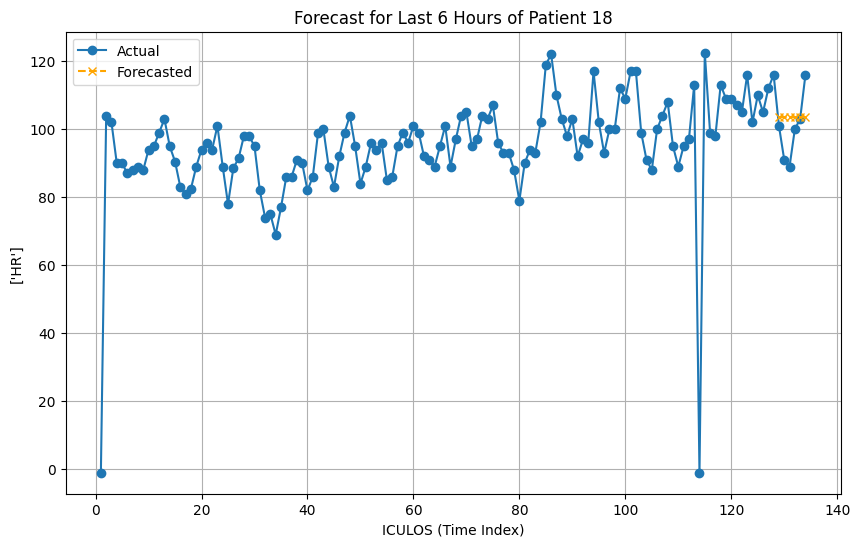

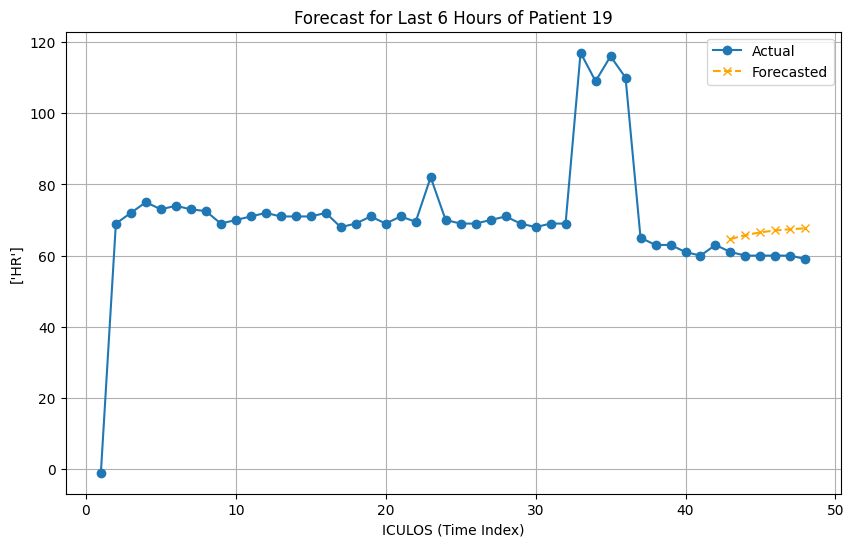

In [3]:
HRforecaster = ARIMAmodel.ARIMAForecaster(['HR'], train_data, test_data)
HRforecaster.fit()
forecasts = HRforecaster.predict(steps=6)

for patient_id in range(1, 20):
    if patient_id in forecasts.index.get_level_values("Patient_ID"):
        HRforecaster.plot_forecast(forecasts, patient_id=patient_id, steps=6)


In [4]:
print(forecasts)

                          HR
Patient_ID ICULOS           
1          49      92.916667
           50      92.916667
           51      92.916667
           52      92.916667
           53      92.916667
...                      ...
57         33      99.825274
           34      93.250421
           35      96.144844
           36      93.113611
           37      94.728422

[312 rows x 1 columns]


In [4]:
HRforecaster.evaluate_model(forecasts)

Model Evaluation Results:
  - Mean Absolute Error (MAE): 10.8223
  - Mean Squared Error (MSE): 298.3376
  - Root Mean Squared Error (RMSE): 17.2725
  - Mean Absolute Percentage Error (MAPE): 12.65%
  - Forecasting Accuracy: 87.35%


{'MAE': 10.822340034579934,
 'MSE': 298.3375892896384,
 'RMSE': 17.272451745181932,
 'MAPE': 12.652034023597093,
 'Accuracy': 87.3479659764029}

In [ ]:
from sktime.datasets import load_basic_motions
basic_motions = load_basic_motions()
basic_motions
